In [1]:
#モジュールの読み込み
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
from sklearn import tree# 決定木
from sklearn.tree import  DecisionTreeRegressor
from sklearn.model_selection import train_test_split #テストデータ分割
from sklearn.tree import export_graphviz #決定木の結果描画用

%matplotlib inline
#データの読み込み
test = pd.read_csv("test.csv")
train = pd.read_csv("train.csv")
test_cp = test
train_cp = train

In [2]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# train = train.fillna(train.mean())

In [4]:
non_categoricals = train[train.dtypes[train.dtypes != "object"].index]
categoricals = train[train.dtypes[train.dtypes == "object"].index]

In [5]:
categoricals 

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
5,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,Shed,WD,Normal
6,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
7,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,...,Attchd,RFn,TA,TA,Y,NaN,NaN,Shed,WD,Normal
8,RM,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,...,Detchd,Unf,Fa,TA,Y,NaN,NaN,NaN,WD,Abnorml
9,RL,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,...,Attchd,RFn,Gd,TA,Y,NaN,NaN,NaN,WD,Normal


In [6]:
# train = pd.get_dummies(train)

In [7]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
# sns.pairplot(train, size=2.0)
# plt.show()

C:\Users\yutaw\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\yutaw\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


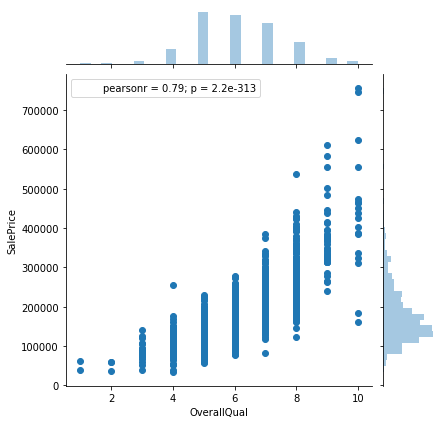

In [9]:
sns.jointplot("OverallQual","SalePrice",data= train)

In [10]:
# train["SalePrice"][train["SalePrice"]>450000]=train["SalePrice"].mean()*1.5
train = train[(train['SalePrice'] < 400000)]

In [11]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1432.000000,1432.000000,1432.000000,1432.000000,1432.000000,1432.000000,1432.000000,1432.000000,1432.000000,1432.000000,...,1432.000000,1432.000000,1432.000000,1432.000000,1432.000000,1432.000000,1432.000000,1432.000000,1432.000000,1432.000000
mean,731.731145,57.112430,69.645139,10363.351955,6.040503,5.581704,1970.721369,1984.494413,96.242177,430.492318,...,92.201816,45.542598,22.013268,3.476257,14.570531,2.425279,44.339385,6.335196,2007.817039,174873.438547
std,422.265491,42.596008,21.640337,9917.557304,1.325356,1.116686,30.092843,20.659056,166.919583,441.541549,...,123.914887,65.568030,61.047717,29.598846,54.592723,37.847445,500.915605,2.703507,1.327046,65922.703937
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,60.000000,7500.000000,5.000000,5.000000,1953.000000,1966.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129500.000000
50%,733.500000,50.000000,70.049958,9375.000000,6.000000,5.000000,1972.000000,1993.000000,0.000000,377.500000,...,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160600.000000
75%,1096.250000,70.000000,78.000000,11423.500000,7.000000,6.000000,2000.000000,2003.250000,153.250000,697.000000,...,168.000000,66.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,209050.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,395192.000000


In [15]:
# No.16
# trainデータとtestデータを含んでいるXmatを、再度trainデータとtestデータに分割
train = Xmat.iloc[:train.shape[0],:]
test = Xmat.iloc[train.shape[0]:,:]

# ランダムフォレストをインポート
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=80, max_features='auto')
rf.fit(X_train, y_train)
print("Training done using Random Forest")

# np.argsort()はソート結果の配列のインデックスを返す。引数の頭に"-"をつけると降順。
# つまり"-rf.feature_importances_"を引数にする事で重要度の高い順にソートした配列のインデックスを返す。
ranking = np.argsort(-rf.feature_importances_)
f, ax = plt.subplots(figsize=(11, 9))
sns.barplot(x=rf.feature_importances_[ranking], y=X_train.columns.values[ranking], orient='h')
ax.set_xlabel("feature importance")
plt.tight_layout()
plt.show()

NameError: name 'Xmat' is not defined

C:\Users\yutaw\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\yutaw\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


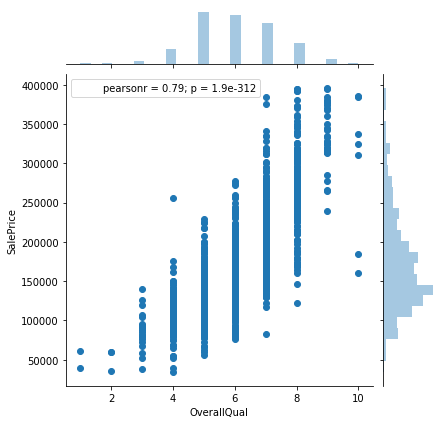

In [12]:
sns.jointplot("OverallQual","SalePrice",data= train)

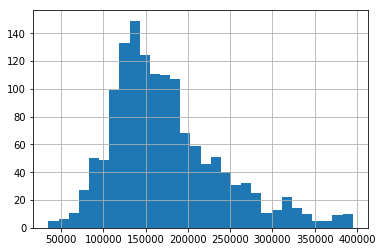

In [13]:
train["SalePrice"].hist(bins=30)

In [14]:
from scipy.stats import skew
train= np.log1p(train)
train.head()

AttributeError: 'int' object has no attribute 'log1p'

In [ ]:
train.isnull().sum()

In [ ]:
# train = train.drop(["LotFrontage"],axis =1)

In [ ]:
train = train.fillna(train.mean)

In [ ]:
train.isnull().sum()

In [ ]:
plt.figure(figsize=(30,30))
sns.heatmap(train.corr() ,vmax=1, vmin=-1, center=0,annot=True,square=True)

In [ ]:
sns.jointplot("OverallQual","SalePrice",data= train)

In [ ]:
train = train[(train['SalePrice'] > 11.2)]

In [ ]:
sns.jointplot("OverallQual","SalePrice",data= train)

In [ ]:
sns.jointplot("GrLivArea","SalePrice",data= train)

In [ ]:
train[(train['SalePrice'] < 12.5 ) & (train['GrLivArea'] > 8.3 )]

In [ ]:
train = train[(train['SalePrice'] >= 12.5 ) | (train['GrLivArea'] <= 8.3 )]

In [ ]:
sns.jointplot("GrLivArea","SalePrice",data= train)

In [ ]:
# sns.pairplot(train, size=2.0)
# plt.show()

In [ ]:
sns.jointplot("TotalBsmtSF","SalePrice",data= train)

In [ ]:
train["TotalBsmtSF"] = train["TotalBsmtSF"].replace(0,train["TotalBsmtSF"].mean())

In [ ]:
sns.jointplot("TotalBsmtSF","SalePrice",data= train)

In [ ]:
sns.pairplot(train, size=2.0)
plt.show()

In [ ]:
plt.figure(figsize=(30,30))
sns.heatmap(train.corr() ,vmax=1, vmin=-1, center=0,annot=True,square=True)

In [ ]:
from sklearn.model_selection import train_test_split

X = train.loc[:,train.columns != "SalePrice"]
y = train.loc[:, ['SalePrice']].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [ ]:
from sklearn.linear_model import Lasso

reg = Lasso(alpha=0.0004)
reg.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import mean_squared_error
print("ラッソ回帰でのRMSE:",np.sqrt(mean_squared_error(reg.predict(X_test), y_test)))